# Solutions

# 1. Reverse a string

Write a function that takes a string and input and returns the exact string in reverse.

In [1]:
def reverse_string(string):
    return_value = ''
    for i in range(0, len(string)):
        return_value += string[-1 * (i + 1)]
    return return_value

In [2]:
def reverse_string(string):
    return string[::-1]

In [4]:
# Reverse string tests
if (reverse_string('Test') == 'tseT' and
    reverse_string('Hello, world!') == '!dlrow ,olleH' and
    reverse_string('Test') == 'tseT'):
    print ('Success')
else:
    print ('Fail')

Success


# 2. Convert string to appropriate type

Write a function that converts a string to either an int or a float, depending on if it has a decimal point. It should return 0 for invalid input.

E.g.

    convert('1.5') -> 1.5
    convert('780') -> 780

In [ ]:
def convert(string):
    # Default to 0
    return_value = 0

    # Try to convert to float - will turn any numeric values into floats but break for words
    try:
        return_value = float(string)
    except ValueError:
        print ('It wasn\'t numeric')

    # If there is no difference between the float version and the int version, then it's an int
    if (return_value - int(return_value)) == 0.0:
        return_value = int(return_value)

    return return_value

In [ ]:
# Convert tests
if (convert('1.5') == 1.5 and
    convert('780') == 780 and
    convert('pupper') == 0 and
    convert('-28.07') == -28.07):
    print ('Success')
else:
    print ('Fail')

It wasn't numeric
Success


# 3. What can I afford?

Write a function that takes a dictionary of shopping items with their associated cost, and a float (your budget), and return a dictionary with the items you can afford with the given budget. Maximise the number of items to be bought.

In [5]:
import operator

def afford(shopping_items, budget):
    # Sort items with cheapest first. NB: sorted() creates a list of tuples (not a dict)
    sorted_items = sorted(shopping_items.items(), key=operator.itemgetter(1))
    
    # Create empty dict to keep track of items
    return_items = {}
    
    # For every item in the shopping list
    for item, price in sorted_items:
        # Add the item if we have the budget for it
        budget -= price
        if budget >= 0:
            return_items[item] = price
    return return_items

In [7]:
# Afford tests
afford1 = {
    'ketchup': 1.69,
    'crisps multipack': 3.50,
    'beer': 3.99,
    'bread': 0.99,
    'salad': 1.20,
    'beans': 0.8
}
afford1_result = {
    'ketchup': 1.69,
    'crisps multipack': 3.50,
    'bread': 0.99,
    'salad': 1.20,
    'beans': 0.8
}
budget1 = 10.0

afford2 = {
    'birthday card': 2.99,
    'makeup': 8.00,
    'charms': 75.00
}
afford2_result = {
    'birthday card': 2.99,
    'makeup': 8.00,
    'charms': 75.00
}
budget2 = 99.99

afford3 = {
    'tv': 349.0,
    'ps4': 280.0,
    'sound bar': 99.0,
    'games': 100.0,
    'accessories': 49.0
}
afford3_result = {
    'sound bar': 99.0,
    'games': 100.0,
    'accessories': 49.0
}
budget3 = 500.0

if (afford(afford1, budget1) == afford1_result and
    afford(afford2, budget2) == afford2_result and
    afford(afford3, budget3) == afford3_result):
    print ('Success')
else:
    print ('Fail')

Success


# 4. Sin and Cos graph

Create a graph using matplotlib that plots both a Sin and Cos wave from x = 0 to x = 10. It should look something like this:

![Sin and Cos plotted](waves.png)

Note: Numpy might come in handy!


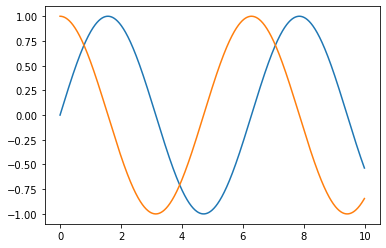

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# Create a numpy array of values between 0 and 10 with a step of 0.01 in between each number
x = np.arange(0, 10, 0.01)

# Create an array for y = sin(x)
y = []
for value in np.nditer(x):
    y.append(math.sin(value))

# Plot this line on the graph
plt.plot(x, y)

# Create an array for y = cos(x)
y = []
for value in np.nditer(x):
    y.append(math.cos(value))

# Plot this line on the graph
plt.plot(x, y)

# Display the graph
plt.show()

# 5. Titanic data

Download `training.csv` of the Titanic dataset from Kaggle (https://www.kaggle.com/c/titanic/data).

Use pandas and other relevant libraries to create the following:

- A table of all women and children (people under 18)
- A table of all survivors
- A graph of ticket price against age

You can ignore rows with missing values.

In [ ]:
# Women and children
import pandas as pd
data = pd.read_csv('train.csv')

# Get all women
women = data[data['Sex'] == 'female']

# Get all children
children = data[data['Age'] < 18]

# Get all males from children (otherwise there would be duplicates)
children_male = children[children['Sex'] == 'male']

# Concatenate the male children onto the women table
pd.concat([women, children_male])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S


In [ ]:
# Survivors
import pandas as pd
data = pd.read_csv('train.csv')

survivors = data[data['Survived'] == 1]

survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


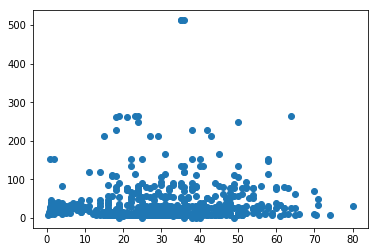

In [ ]:
# Graph of ticket price against age
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('train.csv')

# Set x and y axis to age and fare columns
x = data['Age']
y = data['Fare']

# There are different types of plt charts, we will try scatter
plt.scatter(x, y)
plt.show()

Pandas Solutions

In [ ]:
#1
import pandas as pd
import numpy as np
np.random.RandomState(100)
num_series = pd.Series(np.random.randint(1, 5, [15]))
print("Original Series:")
print(num_series)
print("Top 2 Freq:", num_series.value_counts())
result = num_series[~num_series.isin(num_series.value_counts().index[:1])] = 'Other'
print(num_series)

In [ ]:
#2
# Solution 1: Use chunks and for-loop
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', chunksize=50)
df2 = pd.DataFrame()
for chunk in df:
    df2 = df2.append(chunk.iloc[0,:])


# Solution 2: Use chunks and list comprehension
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv', chunksize=50)
df2 = pd.concat([chunk.iloc[0] for chunk in df], axis=1)
df2 = df2.transpose()

# Solution 3: Use csv reader
import csv          
with open('BostonHousing.csv', 'r') as f:
    reader = csv.reader(f)
    out = []
    for i, row in enumerate(reader):
        if i%50 == 0:
            out.append(row)

df2 = pd.DataFrame(out[1:], columns=out[0])
print(df2.head())

In [ ]:
#3
L = pd.Series(range(15))

def gen_strides(a, stride_len=5, window_len=5):
    n_strides = ((a.size-window_len)//stride_len) + 1
    return np.array([a[s:(s+window_len)] for s in np.arange(0, a.size, stride_len)[:n_strides]])

gen_strides(L, stride_len=2, window_len=4)